## **Instructions for Assignment 4**

# **Building a Classifier for MNIST with K-Nearest Neighbors (KNN) and Hyperparameter Tuning**

In Lab 4, you worked with the MNIST dataset, consisting of images of handwritten digits, each labeled with the number it represents. In this lab report (Assignment), your task is to try to build and fine-tuned a classifier using K-Nearest Neighbors (KNN), aiming to achieve an accuracy greater than 97% on the test set. You will explore the use of grid search for hyperparameter tuning and compare your classifier’s performance with other classifiers used in Lab 4.

Assignment Instructions:

+ Train a KNN Classifier on the MNIST Dataset

+ Use Grid Search with cross-validation to find the best hyperparameter values for your KNN classifier. Focus on optimizing the n_neighbors and weights hyperparameters.

+ Your goal is to achieve at least 97% accuracy on the test set. Use the optimal hyperparameters found in the grid search to fine-tune your model and test its performance on the test set.

+ Compare the accuracy of your KNN classifier with the classifiers you fine-tuned in Lab 4, such as SGD and Random Forest Classifiers.

### **IMPORTING DATA BASE**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
X, y = mnist ["data"], mnist["target"]
X.shape


(70000, 784)

### **Make train and test set**

In [2]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **KNN Grid Search First aproximation**

In order to find how the best parameters we perform a first Grid search that will show us where should we search closer:

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_clf = KNeighborsClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters_KNN_T1 = [{'n_neighbors': [1, 5, 10, 15, 20], 'weights': ['uniform', 'distance']}]

knn_clf = KNeighborsClassifier()

kNN_GridSearch_T1 = GridSearchCV(knn_clf, parameters_KNN_T1, cv=5,return_train_score=True,scoring="accuracy", verbose=3, n_jobs=5)

kNN_GridSearch_T1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [1, 5, ...], 'weights': ['uniform', 'distance']}]"
,scoring,None
,n_jobs,5
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,5


In [24]:
kNN_GridSearch_T1.best_estimator_

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


We saw that the best parameters are with n_neighbors around 5 and the with weigths set up in distance, lets to a closer search around this parameters:

In [8]:
from sklearn.neighbors import KNeighborsClassifier

parameters_KNN_T2 = [{'n_neighbors': [2, 3, 4, 5], 'weights': ['distance']}]

kNN_GridSearch_T2 = GridSearchCV(knn_clf, parameters_KNN_T2, cv=5,return_train_score=True,scoring="accuracy", verbose=3, n_jobs=5)

kNN_GridSearch_T2.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [2, 3, ...], 'weights': ['distance']}]"
,scoring,'accuracy'
,n_jobs,5
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,4


In [9]:
kNN_GridSearch_T2.best_estimator_

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


The best estimator is with n_neighbors = 4 and wights = distance.

### **Accuracy Score in Test set**

Now we have found a promissing tuned estimator, we predict from the test set and meassure accuracy. *(We are looking for at least 97%)*

In [24]:
from sklearn.metrics import accuracy_score

y_pred_knn = kNN_GridSearch_T2.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

The result is *97,14 %* so it means we are in our range!

### **Compare with other methods from lab**

So now we also want to compare thisone with the other we used in the lab like GDS and Random Forest.

#### **SGD TEST**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy",n_jobs=-1)

array([0.8983, 0.891 , 0.9018])

In [12]:
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)

In [25]:
sgd_acc = accuracy_score(y_test, y_pred_sgd)

#### **Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

In [27]:
forest_acc = accuracy_score(y_test, y_pred_forest)

#### **Lets have a look to their confusion matrix**

In [16]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

#### **KNN**

Saving figure confusion_matrix_plot


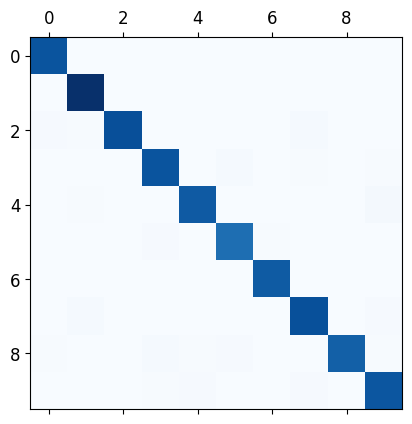

In [17]:
from sklearn.metrics import confusion_matrix
conf_mx_knn = confusion_matrix(y_test, y_pred_knn)

plt.matshow(conf_mx_knn, cmap=plt.cm.Blues)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_plot


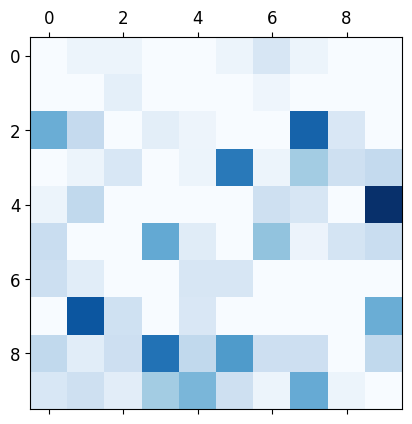

In [18]:
row_sums = conf_mx_knn.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_knn / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.Blues)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()


#### **SGD**

Saving figure confusion_matrix_plot


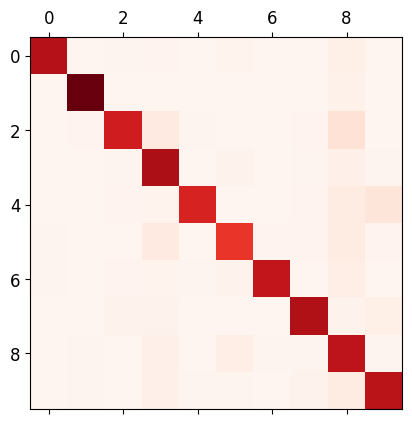

In [19]:
conf_mx_sdg = confusion_matrix(y_test, y_pred_sgd)

plt.matshow(conf_mx_sdg, cmap=plt.cm.Reds)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_plot


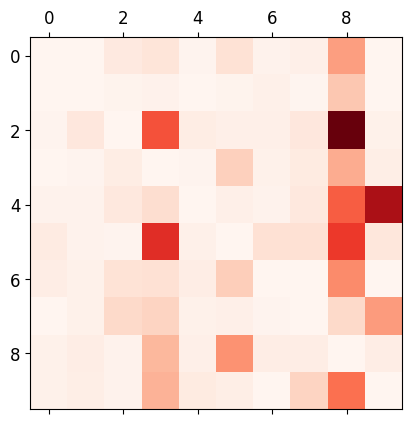

In [20]:
row_sums = conf_mx_sdg.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_sdg / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.Reds)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

#### **Random Forest**

Saving figure confusion_matrix_plot


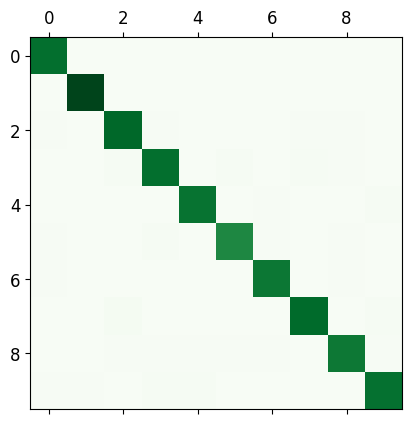

In [21]:
conf_mx_randfor = confusion_matrix(y_test, y_pred_forest)

plt.matshow(conf_mx_randfor, cmap=plt.cm.Greens)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_plot


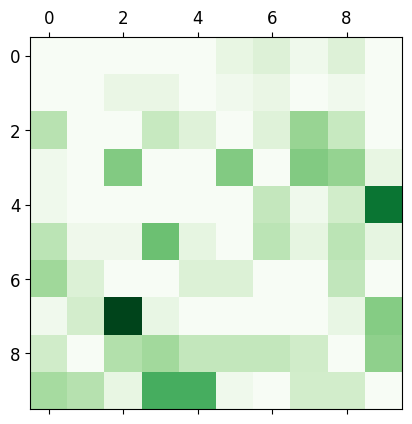

In [22]:
row_sums = conf_mx_randfor.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_randfor / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.Greens)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

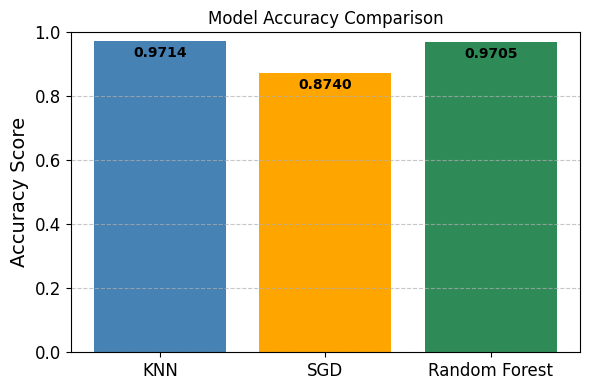

In [36]:
models = ['KNN', 'SGD', 'Random Forest']
accuracies = [knn_acc, sgd_acc, forest_acc]

# Create bar chart
plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['steelblue', 'orange', 'seagreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, v in enumerate(accuracies):
    plt.text(i, v - 0.05, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

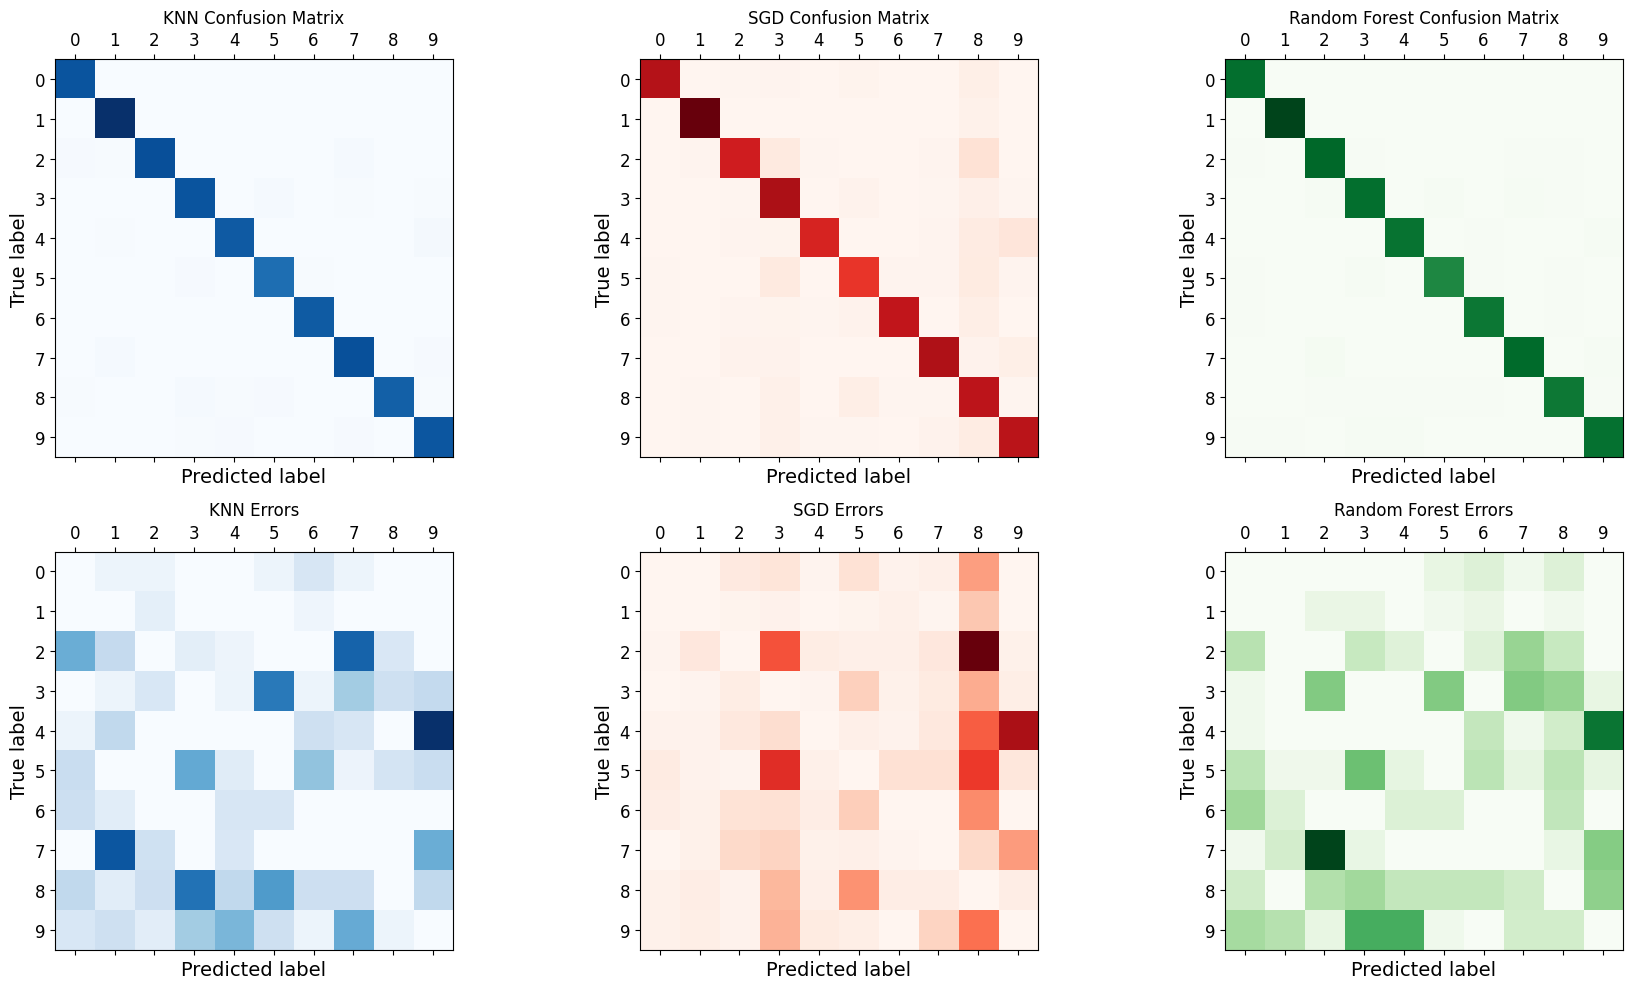

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Define your class labels
# (replace with your actual labels, e.g., class_names = ['cat', 'dog', 'rabbit'])
class_names = np.arange(conf_mx_knn.shape[0])

# --- KNN ---
axes[0, 0].matshow(conf_mx_knn, cmap=plt.cm.Blues)
axes[0, 0].set_title("KNN Confusion Matrix")
axes[0, 0].set_xlabel("Predicted label")
axes[0, 0].set_ylabel("True label")
axes[0, 0].set_xticks(range(len(class_names)))
axes[0, 0].set_yticks(range(len(class_names)))
axes[0, 0].set_xticklabels(class_names)
axes[0, 0].set_yticklabels(class_names)

row_sums_knn = conf_mx_knn.sum(axis=1, keepdims=True)
norm_conf_mx_knn = conf_mx_knn / row_sums_knn
np.fill_diagonal(norm_conf_mx_knn, 0)
axes[1, 0].matshow(norm_conf_mx_knn, cmap=plt.cm.Blues)
axes[1, 0].set_title("KNN Errors")
axes[1, 0].set_xlabel("Predicted label")
axes[1, 0].set_ylabel("True label")
axes[1, 0].set_xticks(range(len(class_names)))
axes[1, 0].set_yticks(range(len(class_names)))
axes[1, 0].set_xticklabels(class_names)
axes[1, 0].set_yticklabels(class_names)

# --- SGD ---
axes[0, 1].matshow(conf_mx_sdg, cmap=plt.cm.Reds)
axes[0, 1].set_title("SGD Confusion Matrix")
axes[0, 1].set_xlabel("Predicted label")
axes[0, 1].set_ylabel("True label")
axes[0, 1].set_xticks(range(len(class_names)))
axes[0, 1].set_yticks(range(len(class_names)))
axes[0, 1].set_xticklabels(class_names)
axes[0, 1].set_yticklabels(class_names)

row_sums_sdg = conf_mx_sdg.sum(axis=1, keepdims=True)
norm_conf_mx_sdg = conf_mx_sdg / row_sums_sdg
np.fill_diagonal(norm_conf_mx_sdg, 0)
axes[1, 1].matshow(norm_conf_mx_sdg, cmap=plt.cm.Reds)
axes[1, 1].set_title("SGD Errors")
axes[1, 1].set_xlabel("Predicted label")
axes[1, 1].set_ylabel("True label")
axes[1, 1].set_xticks(range(len(class_names)))
axes[1, 1].set_yticks(range(len(class_names)))
axes[1, 1].set_xticklabels(class_names)
axes[1, 1].set_yticklabels(class_names)

# --- Random Forest ---
axes[0, 2].matshow(conf_mx_randfor, cmap=plt.cm.Greens)
axes[0, 2].set_title("Random Forest Confusion Matrix")
axes[0, 2].set_xlabel("Predicted label")
axes[0, 2].set_ylabel("True label")
axes[0, 2].set_xticks(range(len(class_names)))
axes[0, 2].set_yticks(range(len(class_names)))
axes[0, 2].set_xticklabels(class_names)
axes[0, 2].set_yticklabels(class_names)

row_sums_randfor = conf_mx_randfor.sum(axis=1, keepdims=True)
norm_conf_mx_randfor = conf_mx_randfor / row_sums_randfor
np.fill_diagonal(norm_conf_mx_randfor, 0)
axes[1, 2].matshow(norm_conf_mx_randfor, cmap=plt.cm.Greens)
axes[1, 2].set_title("Random Forest Errors")
axes[1, 2].set_xlabel("Predicted label")
axes[1, 2].set_ylabel("True label")
axes[1, 2].set_xticks(range(len(class_names)))
axes[1, 2].set_yticks(range(len(class_names)))
axes[1, 2].set_xticklabels(class_names)
axes[1, 2].set_yticklabels(class_names)

plt.tight_layout()
plt.show()


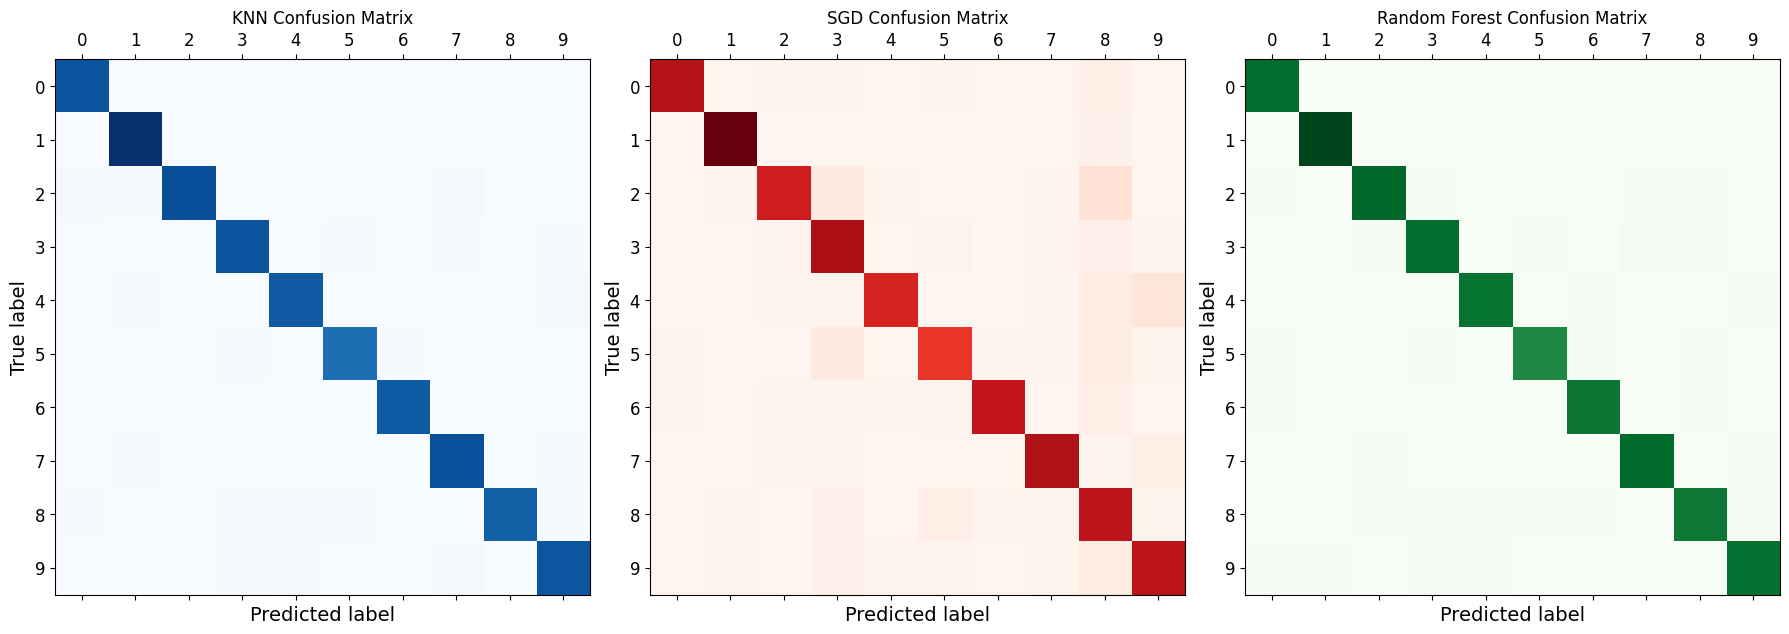

In [38]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define class labels
# (Replace with your actual labels)
class_names = np.arange(conf_mx_knn.shape[0])

# --- KNN ---
axes[0].matshow(conf_mx_knn, cmap=plt.cm.Blues)
axes[0].set_title("KNN Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")
axes[0].set_xticks(range(len(class_names)))
axes[0].set_yticks(range(len(class_names)))
axes[0].set_xticklabels(class_names)
axes[0].set_yticklabels(class_names)

# --- SGD ---
axes[1].matshow(conf_mx_sdg, cmap=plt.cm.Reds)
axes[1].set_title("SGD Confusion Matrix")
axes[1].set_xlabel("Predicted label")
axes[1].set_ylabel("True label")
axes[1].set_xticks(range(len(class_names)))
axes[1].set_yticks(range(len(class_names)))
axes[1].set_xticklabels(class_names)
axes[1].set_yticklabels(class_names)

# --- Random Forest ---
axes[2].matshow(conf_mx_randfor, cmap=plt.cm.Greens)
axes[2].set_title("Random Forest Confusion Matrix")
axes[2].set_xlabel("Predicted label")
axes[2].set_ylabel("True label")
axes[2].set_xticks(range(len(class_names)))
axes[2].set_yticks(range(len(class_names)))
axes[2].set_xticklabels(class_names)
axes[2].set_yticklabels(class_names)

plt.tight_layout()
plt.show()
